In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

In [19]:
df = pd.read_csv('../../data/data.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [21]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [22]:
Numerical_columns = df.select_dtypes(exclude = 'object').columns
Categorical_columns = df.select_dtypes(include = 'object').columns
Numerical_columns,Categorical_columns

(Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
        'Price (Euro)'],
       dtype='object'),
 Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company',
        'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys'],
       dtype='object'))

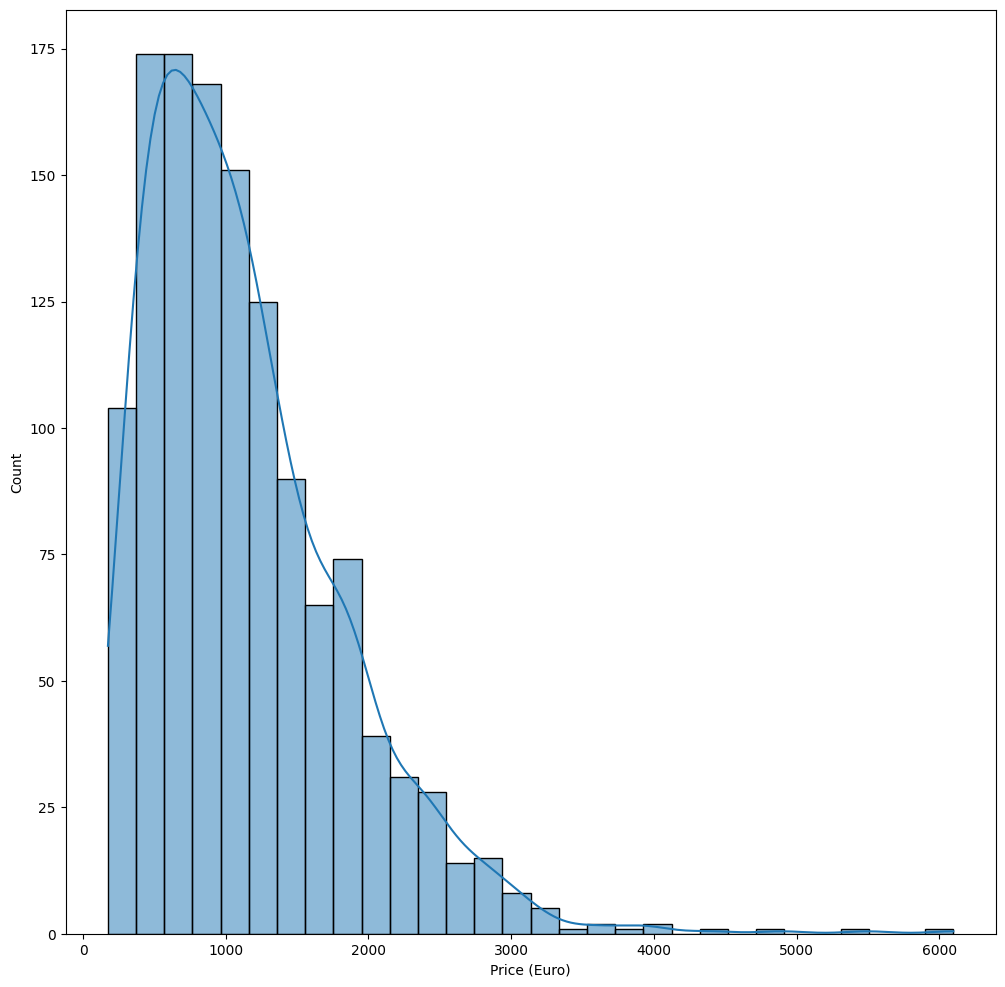

In [23]:
plt.figure(figsize =(12,12))
sns.histplot(data = df ,x='Price (Euro)',kde =True,bins =30 )
plt.show()

In [24]:
X = df.drop(columns= 'Price (Euro)')
y = df['Price (Euro)']

In [25]:
from sklearn.preprocessing import StandardScaler

label_scaler = StandardScaler()
y = label_scaler.fit_transform(y.values.reshape(-1,1))

In [26]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for cols in X.select_dtypes('object').columns:
    label = LabelEncoder()
    X[cols]=label.fit_transform(X[cols])
    encoders[cols] = label

In [27]:
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[Numerical_columns] = scaler.fit_transform(df[Numerical_columns])

In [29]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.2)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

C:\Users\yarab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [31]:
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('R2 Score:', r2_score(y_test,y_pred))


Mean Squared Error: 0.1444056825201819
R2 Score: 0.8568994165092295


In [32]:
y_pred = label_scaler.inverse_transform(y_pred.reshape(-1,1))

In [34]:
import pickle

with open('../../models/model.pkl','wb') as file:
    pickle.dump(model, file)

with open('../datasets/encoders.pkl','wb') as file:
    pickle.dump(encoders, file)

with open('../datasets/num_scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

with open('../datasets/object_scaler.pkl','wb') as file:
    pickle.dump(feature_scaler, file)

with open('../datasets/label_scaler.pkl','wb') as file:
    pickle.dump(label_scaler, file)